In [46]:
from IPython.display import FileLink

In [47]:
!head /home/armanda/N-project/data/Cornell_Farms/CF_Noxide.csv

In [48]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [49]:
%%R
library(dplyr)
library(ggplot2)
library(tidyr)

In [70]:
%%R
df = read.csv("/home/armanda/N-project/data/Cornell_Farms/CF_Noxide.csv") %>%
    gather(Gene.ID, count, 
           -Sample.Name, 
           -Sequence.Read.Depth,
           -Location) %>%
    mutate(Relative.Count = count / Sequence.Read.Depth * 1000000)

df$Location = factor(df$Location, levels = c("W", "D", "H", "F"))

df %>% head

  Sample.Name Sequence.Read.Depth Location Gene.ID count Relative.Count
1        JC01            23813868        D     Nap   760       31.91418
2        JC02            23624099        D     Nap   685       28.99581
3        JC03            22578339        D     Nap   595       26.35269
4        JC04            22256794        W     Nap   703       31.58586
5        JC05            15557093        W     Nap   323       20.76223
6        JC06            20733371        W     Nap   650       31.35043


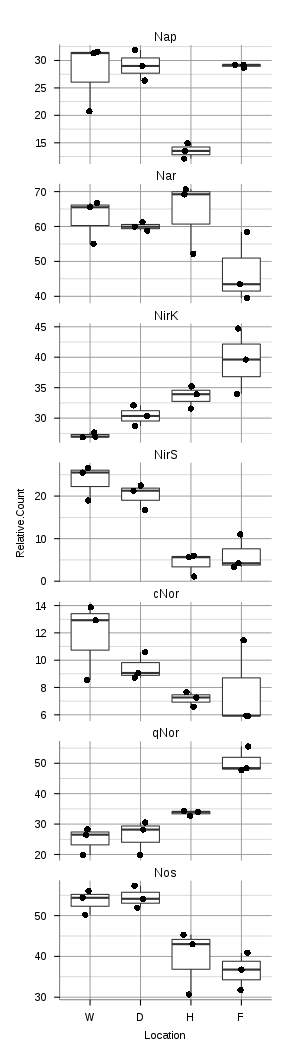

In [71]:
%%R -w 300 -h 1050
p = ggplot(df, aes(x = Location, y = Relative.Count))

p = p + facet_wrap(~Gene.ID, scales = "free_y", ncol = 1)

p = p + geom_boxplot()

p = p + geom_point(size = 3, position = position_jitter(w = 0.15, h = 0))

p = p + theme_agile()

p

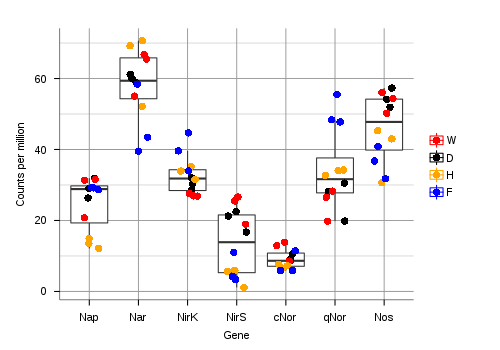

In [72]:
%%R -w 500 -h 350
p = ggplot(df, aes(x = Gene.ID, y = Relative.Count, color = Location))

p = p + geom_boxplot(aes(group = Gene.ID))

p = p + geom_point(size = 3.5, position = position_jitter(w = 0.20, h = 0))

p = p + scale_color_manual(values = c("red", "black", "orange", "blue"))
p = p + theme_agile()

p = p + labs(y = "Counts per million", x= "Gene")

p = p + theme(axis.title = element_text(size = 20))

p

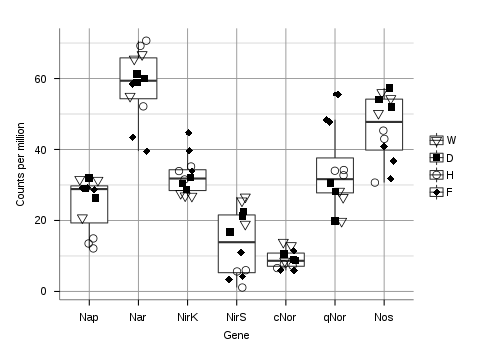

In [73]:
%%R -w 500 -h 350
p = ggplot(df, aes(x = Gene.ID, y = Relative.Count, shape = Location))

p = p + geom_boxplot(aes(group = Gene.ID))

p = p + geom_point(size = 3.5, position = position_jitter(w = 0.20, h = 0))

p = p + scale_shape_manual(values = c(6, 15, 1, 18))

p = p + theme_agile()

p = p + labs(y = "Counts per million", x= "Gene")

p = p + theme(axis.title = element_text(size = 20))

p

In [10]:
							bg_col = ifelse(plot_type == "formal", "white", "#F0F0F0"), title_font = base_family , base_col  = "black", axis_lines = TRUE,
												minor_grid = ifelse(plot_grid, TRUE, FALSE), vert_grid = ifelse(plot_grid, TRUE, FALSE), ticks_length = ifelse(ticks_type == "outer", 0.2, -0.2), horz_grid = ifelse(plot_grid, TRUE, FALSE), alpha_leg = 0.1, bord_size = 0,
												legend_bg = ifelse(plot_type == "formal", "white", "#F0F0F0"), strip_bg = ifelse(plot_type == "formal", "white", "khaki1"), grid_thick = 1){
	theme_bw()+
		ggplot2::theme(
			plot.margin = grid::unit(c(1, 1, .5, .7), "cm"),
			text = ggplot2::element_text(family = base_family, size = base_size),
			axis.line =  element_line(size = ifelse(axis_lines, grid::unit(lines_lwd, "mm"),0), color = "black"),
			axis.ticks.length = grid::unit(ticks_length, "cm"),
			axis.ticks.margin = grid::unit(ifelse(ticks_length > 0,0.25, -ticks_length + 0.25) , "cm"),
			axis.text.x = ggplot2::element_text(size = base_size, colour = base_col , family = axis_font),
			axis.text.y = ggplot2::element_text(size = base_size, colour = base_col , family = axis_font),
			axis.title.y = ggplot2::element_text(size =  base_size, colour = base_col , vjust = 1.5, family = axis_font),
			axis.title.x = ggplot2::element_text(size = base_size,colour = base_col ,vjust = -.5, family = axis_font),
			panel.background = ggplot2::element_rect(fill = bg_col),
			plot.background = ggplot2::element_rect(fill = bg_col),
			panel.border = ggplot2::element_rect(colour = "black", fill=NA, size = bord_size),
			panel.grid.major.x = ggplot2::element_line(colour = ifelse(vert_grid, "grey60",bg_col), size = ifelse(vert_grid,0.45 * grid_thick, 0)),
			panel.grid.minor.x = ggplot2::element_line(colour = ifelse(vert_grid, ifelse(minor_grid, "grey80",bg_col),bg_col), size = ifelse(vert_grid,0.35* grid_thick, 0)),
			panel.grid.major.y = ggplot2::element_line(colour = ifelse(horz_grid, "grey60",bg_col), size = ifelse(horz_grid,0.45* grid_thick, 0)),
			panel.grid.minor.y = ggplot2::element_line(colour = ifelse(horz_grid, ifelse(minor_grid, "grey80",bg_col),bg_col), size = ifelse(horz_grid,0.35* grid_thick, 0)),
			panel.grid.major = ggplot2::element_line(colour = "grey40", size=0.45),
			plot.title = ggplot2::element_text(face="bold",hjust = ifelse(plot_type == "formal", 0.5, 0) ,vjust = 2, colour = base_col , size = title_size, family = title_font),
			legend.background = ggplot2::element_rect(fill = scales::alpha(legend_bg, alpha_leg)), legend.key = ggplot2::element_blank(),
			legend.text = ggplot2::element_text(size = legend_size),
			legend.title = element_blank(),
			strip.background =  ggplot2::element_rect(colour = strip_bg, fill = strip_bg),
			strip.text.x = ggplot2::element_text(size = base_size + 1),
			strip.text.y = ggplot2::element_text(size = base_size + 1)
		)
}

In [74]:
%%R
library(dplyr); library(tidyr)
library(phyloseq)
library(ggplot2)
library(vegan)
library(FField)

In [75]:
%%R
sd = read.csv("/home/armanda/N-project/data/Cornell_Farms/CF_Noxide.csv", stringsAsFactors = FALSE) %>%
    select(Sample.Name, Location)

rownames(sd) = sd$Sample.Name

sd = sample_data(sd)

In [76]:
%%R
counts = read.csv("/home/armanda/N-project/data/Cornell_Farms/CF_Noxide.csv", stringsAsFactors = FALSE) %>%
    select(Nap, Nar, NirK, NirS, cNor, qNor, Nos, Sample.Name, Sequence.Read.Depth) %>%
    gather(key, value, -Sample.Name, -Sequence.Read.Depth) %>%
    mutate(count = value / Sequence.Read.Depth * 1000000) %>%
    select(Sample.Name, key, count) %>%
    spread(key, count)

rownames(counts) = counts$Sample.Name

counts$Sample.Name = NULL

counts = otu_table(counts, taxa_are_rows = FALSE)

In [77]:
%%R
counts %>% head

OTU Table:          [7 taxa and 6 samples]
                     taxa are columns
          Nap      Nar     NirK     NirS      cNor     qNor      Nos
JC01 31.91418 61.22483 32.08215 16.75494 10.582069 30.52843 51.94452
JC02 28.99581 59.93879 30.35036 22.47705  9.058547 28.19155 57.31436
JC03 26.35269 58.81744 28.70007 21.25931  8.725177 19.84203 54.12267
JC04 31.58586 65.50809 26.95806 25.52030 13.883401 28.26103 54.36542
JC05 20.76223 55.02313 27.64013 18.96241  8.549155 19.79804 50.20218
JC06 31.35043 66.75229 26.86490 26.62375 12.926022 26.52728 56.04491


In [78]:
%%R
ps = phyloseq(sd, counts)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 2 sample variables ]


Square root transformation
Wisconsin double standardization
Run 0 stress 0.02641419 
Run 1 stress 0.02641437 
... procrustes: rmse 0.0002395954  max resid 0.0003752201 
*** Solution reached


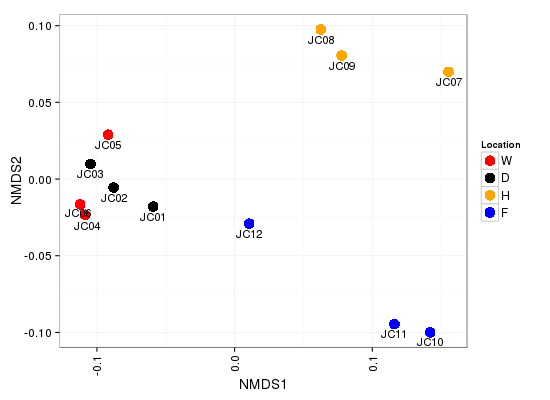

In [85]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "NMDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Location = factor(ord.plot$Location, levels = c("W", "D", "H", "F"))

ord.plot.nmds = ord.plot

x.fact <- 100 / max(ord.plot.nmds$NMDS1)
y.fact <- 100 / max(ord.plot.nmds$NMDS2)

coords = FFieldPtRep(coords = cbind(ord.plot.nmds$NMDS1 * x.fact,
                                    ord.plot.nmds$NMDS2 * y.fact), 
                     rep.fact = 70)

ord.plot.nmds$text.x = coords$x / x.fact
ord.plot.nmds$text.y = coords$y / y.fact

p = ggplot(ord.plot.nmds, aes(x = NMDS1, y = NMDS2, color = Location))

p = p + geom_point(size = 5)

p = p + scale_color_manual(values = c("red", "black", "orange", "blue"))

#p = p + scale_shape_manual(values = c(6, 15, 1, 18))

p = p + scale_size_discrete(range = c(4,8))

p = p + geom_text(color = "black", aes(x = text.x, 
                                       y = text.y,
                                       label = Sample.Name), size = 4, vjust = 1.75, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 5)))           

p

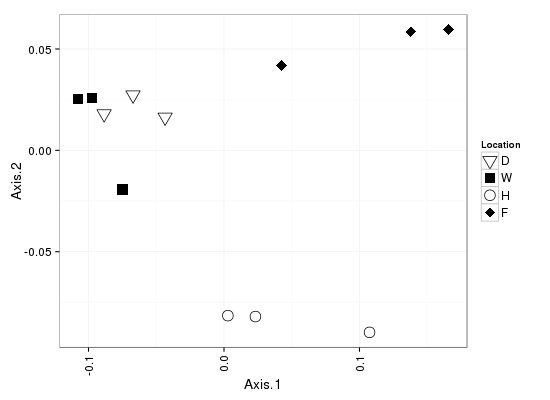

In [65]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "PCoA", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Location = factor(ord.plot$Location, levels = c("W", "D", "H", "F"))

ord.plot.mds = ord.plot

p = ggplot(ord.plot.mds, aes(x = Axis.1, y = Axis.2, shape = Location))

p = p + geom_point(size = 5)

#p = p + scale_color_manual(values = c("red", "black", "orange", "blue"))

p = p + scale_shape_manual(values = c(6, 15, 1, 18))

p = p + scale_size_discrete(range = c(4,8))

#p = p + geom_text(color = "black", aes(x = Axis.1, 
                                       #y = Axis.2,
                                       #label = Sample.Name), size = 4, vjust = 1.75, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 5)))

p

In [67]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Location = factor(data$Location, levels = c("D", "W", "H", "F"))

adonis(bray.dist ~ Location, data)


Call:
adonis(formula = bray.dist ~ Location, data = data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Location   3  0.117496 0.039165  11.261 0.80854  0.001 ***
Residuals  8  0.027823 0.003478         0.19146           
Total     11  0.145319                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
